In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print("Model loaded successfully")



Model loaded successfully


In [4]:
def object_detection(path):
    # read image
    image = load_img(path)
    image = np.array(image, dtype=np.uint8)
    image1 = load_img(path, target_size=(224, 224))
    image_arr_224 = img_to_array(image1)/255.0
    h,w, d = image.shape
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    
    #make prediction
    coords = model.predict(test_arr)
    
    #----- Denormalize
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)
    
    return image, coords
    
    

In [5]:
import pytesseract as pt

1/1 [==============================] - 5s 5s/step


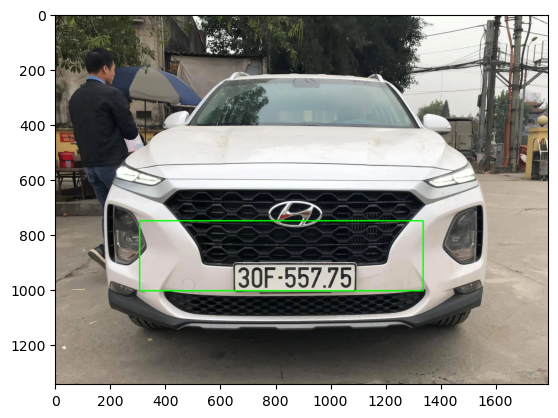

In [6]:
image, coords = object_detection('./test_images/30f55775.jpg')
plt.imshow(image)
plt.show()

In [7]:
xmin, xmax, ymin, ymax = coords[0]
roi = image[ymin:ymax, xmin:xmax]

In [12]:
from skimage.filters import threshold_local

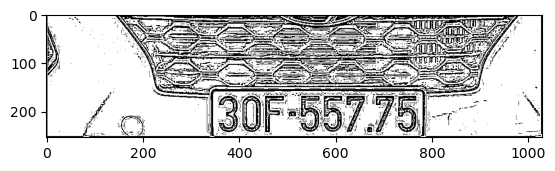

In [14]:
plt.imshow(roi)
plt.show()

In [15]:
# extract text
pt.image_to_string(roi)

' \n\n'